# Harnessing the Power of Information Extraction from Text Data: Insights from the LISA Dataset

Information extraction (IE) is a vital process in transforming unstructured text data into structured, valuable information. In the contemporary digital age, vast amounts of data are generated daily, and extracting relevant insights from this data can greatly benefit both businesses and scientific research. In this article, we delve into the essence of information extraction, explore its applications, and walk through the process using the LISA dataset as an example.

## Introduction to Information Extraction

Information Extraction involves automatically retrieving specific pieces of information from text sources. It focuses on identifying and pulling out pertinent data points such as names, dates, places, and other entities to form new, structured datasets. This automated process supports various applications, enhancing data analysis and decision-making.

## Applications in Business and Science

### Enhancing Customer Insights

Businesses can leverage information extraction to understand customer sentiments by analyzing reviews and feedback. Extracting keywords and sentiment indicators helps companies tailor their products or services to better meet customer needs, ultimately boosting satisfaction and loyalty.

### Streamlining Scientific Research

In scientific research, information extraction simplifies literature reviews by identifying key elements like methodologies, results, and references in vast amounts of academic papers. This allows researchers to stay updated with the latest developments and efficiently incorporate relevant findings into their work.


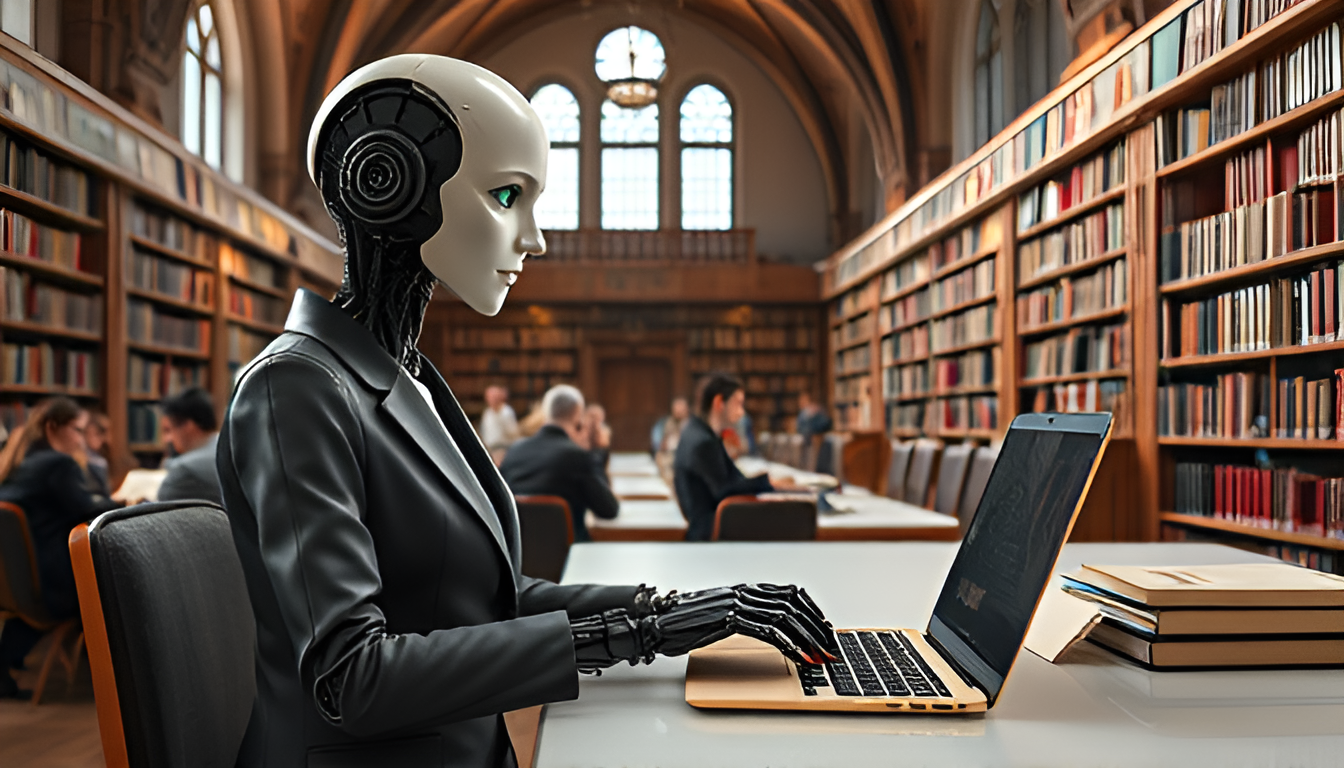

# Steps in Extracting Information from the LISA Dataset

## 1. Importing Libraries

To kick off the process, we need several libraries that facilitate different stages of information extraction. Key libraries include:
- `numpy` for numerical operations
- `pandas` for data manipulation
- `re` for regular expressions and string manipulation
- `sklearn` for machine learning algorithms
- `warnings` to handle warning messages efficiently
- `matplotlib.pyplot` for visualization
- `my_func`, a custom library containing preprocessing functions

These tools collectively form a powerful toolkit to handle the intricacies of the LISA dataset.

In [1]:
# re, numpy, pandas and mayplotlib 
import re
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# sklearn
from sklearn import metrics
from sklearn.pipeline import Pipeline
from sklearn.decomposition import TruncatedSVD
from sklearn.metrics import pairwise_distances
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer

# custom library
import text_func

# warning
import warnings
warnings.filterwarnings('ignore')

## 2. Loading the Dataset

The next step involves loading the LISA dataset into a pandas DataFrame, which allows for seamless data manipulation and examination. This stage is crucial for understanding the structure and content of the dataset.

In [2]:
QUE = open(r'Data/LISA.QUE', 'r').read()
que = pd.DataFrame(re.split(r'#\n\d+\n' , QUE) ,
                   columns = ["body"] , 
                   index = list(range(1 , 36)))

que.iloc[0][0] = que.iloc[0][0][2 : ]
que.head()

,body
1,I AM INTERESTED IN THE IDENTIFICATION AND EVAL...
2,I WOULD BE INTERESTED TO RECEIVE INFORMATION O...
3,I AM INTERESTED IN COMPUTER DOCUMENTATION SYST...
4,I WOULD BE PLEASED TO RECEIVE ANY INFORMATION ...
5,MY DISSERTATION IS AN OVERVIEW OF NEWS DATABAS...


In [3]:
NUM = open('Data/LISARJ.NUM', 'r').read()

c = 0
num_list = []
num = [ int(i) for i in NUM.split() ]

for i in range(1 , 36) :
    n = num[c + 1]
    s = n + 2
    num_list.append(num[c : c + s])
    c= c + s 

for i in range(len(num_list)) :
    num_list[i] = [num_list[i][0] ,
                   num_list[i][1] ,
                   num_list[i][2 : ]]

num_list = pd.DataFrame(num_list ,
                        columns = ["index" , "count" , "docs"] ,
                        index = list(range(1 , 36)))

num_list = num_list.drop("index" ,axis = 1)
num_list.head()

,count,docs
1,2,"[3392, 3396]"
2,2,"[2623, 4291]"
3,5,"[1407, 1431, 3794, 3795, 3796]"
4,7,"[604, 3527, 4644, 5087, 5112, 5113, 5295]"
5,1,[3401]


In [4]:
dataset = []
filenames = [ 'LISA0.001' ,
              'LISA0.501' ,
              'LISA1.001' ,
              'LISA1.501' ,
              'LISA2.001' ,
              'LISA2.501' ,
              'LISA3.001' ,
              'LISA3.501' ,
              'LISA4.001' ,
              'LISA4.501' ,
              'LISA5.001' ,
              'LISA5.501' ,
              'LISA5.627' ,
              'LISA5.850' ] 

for i in filenames :   
    
    lisa = open('Data/' + i , 'r').read()    
    for row in re.split(r'\*+\n' , lisa) :      
        m = re.split(r'\n\s*\n' , row)
        if len(m) == 2 :
            inf = m[0]
            body = m[1]
            index = re.findall(r'\d+' , re.findall(r'Document.*\d' , inf)[0])[0]
            title = re.split(r'Document.*\d*\n' , inf)[1]
            dataset.append([index, title + " " + body])

trainset = pd.DataFrame(dataset, 
                        columns = ['index' , 'body'])

trainset.set_index('index', inplace = True)
trainset.head()

,body
index,
1,THE INDIAN COUNCIL OF LIBRARY AND INFORMATION ...
2,THE LINGERING FRAGRANCE: PROCEEDINGS OF THE XX...
3,XXV ALL INDIA LIBRARY CONFERENCE TRIVANDRUM 14...
4,MALAWI LIBRARY ASSOCIATION SECOND ANNUAL GENER...
5,A PERSONAL VIEW OF THE ZAMBIA LIBRARY SERVICE....


## 3.  Preprocessing

Preprocessing the text data is crucial in preparing it for machine learning models. Here are the essential preprocessing steps:

**Stemming:** Reduces words to their root forms, aiding in uniformity.

**Removing Punctuation:** Cleans the text by eliminating unnecessary symbols.

**Tokenization:** Splits text into individual words or tokens, facilitating analysis.

**Fixing Contractions:** Expands contractions (e.g., "don't" to "do not"), ensuring consistency.

**Removing Numbers and Stop Words:** Filters out irrelevant numbers and common words like 'is,' 'and,' to focus on significant terms.

**Removing HTML Tags:** Cleans out any HTML tags present in the data.

**Converting to Lowercase:** Ensures uniformity by converting all text to lowercase.

In [5]:
pp_documents = pd.DataFrame(text_func.final_preprocess(trainset["body"] ,
                                                       lemmatization = False , # lemmatization
                                                        stemming = True , # Stemming
                                                        removing_punc = True , # Removing Punctuation
                                                        tokeniz = True , # Tokenization
                                                        fixing_contractions = True , # Fixing Contractions
                                                        removing_number = True , # Removing Numbers
                                                        removing_sw = True , # Removing Stop Words
                                                        removing_html = True , # Removing HTML Tags
                                                        converting_to_lowercase = True )) #Converting to Lowercase

In [6]:
pp_queries = pd.DataFrame(text_func.final_preprocess(que["body"] ,
                                                     lemmatization = False , # lemmatization
                                                     stemming = True , # Stemming
                                                     removing_punc = True , # Removing Punctuation
                                                     tokeniz = True , # Tokenization
                                                     fixing_contractions = True , # Fixing Contractions
                                                     removing_number = True , # Removing Numbers
                                                     removing_sw = True , # Removing Stop Words
                                                     removing_html = True , # Removing HTML Tags
                                                     converting_to_lowercase = True )) #Converting to Lowercase

After preprocessing, five sample entries are saved into a file named `pp_samples.txt` for future reference.

In [7]:
def write_file(pp_documents , name , n) :
    
    file = open (name , 'w')
    for i in range(n) :
        file.write("sample " + str(i + 1) + ": " + " ".join(pp_documents.iloc[i]["body"]) + ' ' + "\n\n")
    
    file.close()

In [8]:
write_file(pp_documents ,
           'pp_samples.txt' , 
           5)

## 4. Creating the TF-IDF Model

With the data preprocessed, we now turn to building a Term Frequency-Inverse Document Frequency (TF-IDF) model. This step comprises several sub-steps:


- **Finding Unique Words**: We begin by determining the number of unique words present in the dataset.

In [9]:
print("\nThere are" ,
      len(text_func.create_words_dict(pp_documents["body"]).keys()) ,
      "unique words in all documents and" ,
      len(text_func.create_words_dict(pp_queries["body"]).keys()),
      "unique words in all queries.\n")


There are 14036 unique words in all documents and 449 unique words in all queries.



- **Data Preparation**: Next, we format our data appropriately for Scikit-learn functions.

In [10]:
def text_maker(pp_tokens) :
    
    txt = []
    for i in range(len(pp_tokens)) :
        txt.append(" ".join(pp_tokens.iloc[i]["body"]))
    
    txt = pd.DataFrame(txt ,
                       columns = ['texts'])
    
    return txt

In [11]:
pp_documents_txt = text_maker(pp_documents).set_index(pp_documents.index)
pp_queries_txt = text_maker(pp_queries).set_index(pp_queries.index)

- **Using CountVectorizer**: We apply this function with specific hyperparameters: `stop_words=None`, `max_df=1.0`, `min_df=1`, and `binary=False`. This sets the stage for transforming text into a numerical format.

In [12]:
tfidf_vectorizer = CountVectorizer(stop_words = None ,
                                   max_df = 1.0 ,
                                   min_df = 1 ,
                                   binary = False)

tfidf_vector = tfidf_vectorizer.fit_transform(pp_documents_txt['texts'])

- **Applying TfidfTransformer**: We configure this transformer with parameters including `norm=None`, `use_idf=True`, `smooth_idf=True`, and `sublinear_tf=True` to optimize the representation of our text data.

In [13]:
tfidf_transformer = TfidfTransformer(norm = None ,
                                     use_idf = True ,
                                     smooth_idf = True ,
                                     sublinear_tf = True)


tfidf_documents = tfidf_transformer.fit_transform(tfidf_vector)
tfidf_query= tfidf_transformer.transform(tfidf_vectorizer.transform(pp_queries_txt['texts']))

- **Calculating Cosine Similarity**: Finally, we compute the cosine similarity matrix, which measures document similarity based on the TF-IDF scores.

In [14]:
cosine_sim_tfidf = cosine_similarity(tfidf_query , tfidf_documents)

cosin_sim_tfidf = pd.DataFrame(np.argsort(-cosine_sim_tfidf) ,
                               columns = ["rank" + str(i) for i in range(1 , 6002)] ,
                               index = list(range(1 , 36)))

cosin_sim_tfidf.head()

,rank1,rank2,rank3,rank4,rank5,rank6,rank7,rank8,rank9,rank10,...,rank5992,rank5993,rank5994,rank5995,rank5996,rank5997,rank5998,rank5999,rank6000,rank6001
1,3600,1953,3479,3392,3980,5848,3388,4922,342,188,...,1903,4206,4207,1892,4209,4210,4211,1890,1902,3000
2,4594,4287,2620,579,5628,108,364,2619,4841,2849,...,948,1614,3960,4927,4926,1607,1606,4920,5511,4846
3,1429,4278,1051,3792,1705,3811,4739,3221,1310,3889,...,4592,3121,3124,4581,522,4579,3128,4577,2003,2499
4,5139,4001,2696,5167,1629,179,4000,4596,3169,3218,...,4795,2946,4968,2944,4966,3884,2942,2941,4802,2461
5,4948,3015,305,5927,53,1983,1905,91,4435,5984,...,1092,5584,176,5586,175,2383,1086,3199,1087,3000


In [15]:
doc = {}
for i in range(6001) :
    doc[i] = int(pp_documents_txt.index[i])

## 5. Model Evaluation

To assess the effectiveness of our model, we explore the optimal value of "n," representing the number of nearest documents for our query. Two custom functions, `first_nth` and `calculate_metrics`, help us derive essential metrics such as precision, recall, and F1 score.

We show models with various values of n (5, 10, 20, 40), we also execute a loop to calculate performance metrics for n ranging from 1 to 40. By plotting the results, we discover that the best-performing "n" for our models is 11!


In [16]:
def first_nth(n , cosin_sim) :
    
    most_similar = []
    for i in range(35) :
        most_similar.append(cosin_sim.iloc[i][ : n].map(doc))
        
    return pd.DataFrame(most_similar)

In [17]:
def calculate_metrics(n , first_nth) :
    
    tp = 0
    tn = 0
    fp = 0
    fn = 0
    for i in range(35) :
        
        temp_model = set(first_nth.iloc[i][ : n])
        temp_query = set(num_list['docs'].iloc[i])
        
        tp += len(temp_model.intersection(temp_query))
        fp += len(temp_model) - len(temp_model.intersection(temp_query))
        fn += len(temp_query) - len(temp_model.intersection(temp_query))
   
    percision = tp / (tp + fp)
    recall = tp / (tp + fn)
    f_measure = 2 * (percision * recall) / (percision + recall)
    
    return np.round(f_measure , 3) , np.round(percision , 3) , np.round(recall , 3)

### model with n = 5 :

In [18]:
first_5th_tfidf = first_nth(5 , cosin_sim_tfidf)

In [19]:
metrics_tfidf5 = calculate_metrics(5 , first_5th_tfidf)

In [20]:
print('\nfor TF-IDF model with using 5 nearest documents F_1 is:' ,
      metrics_tfidf5[0] ,
      'percision is:' ,
      metrics_tfidf5[1] ,
      'and recall is:' ,
      metrics_tfidf5[2],
     '.\n')

first_5th_tfidf.head()


for TF-IDF model with using 5 nearest documents F_1 is: 0.224 percision is: 0.354 and recall is: 0.164 .



,rank1,rank2,rank3,rank4,rank5
1,3604,1956,3483,3396,3984
2,4598,4291,2624,580,5632
3,1431,4282,1053,3796,1707
4,5143,4005,2700,5171,1631
5,4952,3019,306,5931,54


### model with n = 10 :

In [21]:
first_10th_tfidf = first_nth(10 , cosin_sim_tfidf)

In [22]:
metrics_tfidf10 = calculate_metrics(10 , first_10th_tfidf)

In [23]:
print('\nfor TF-IDF model with using 10 nearest documents F_1 is:' ,
      metrics_tfidf10[0] ,
      'percision is:' ,
      metrics_tfidf10[1] ,
      'and recall is:' ,
      metrics_tfidf10[2],
     '.\n')

first_10th_tfidf.head()


for TF-IDF model with using 10 nearest documents F_1 is: 0.261 percision is: 0.271 and recall is: 0.251 .



,rank1,rank2,rank3,rank4,rank5,rank6,rank7,rank8,rank9,rank10
1,3604,1956,3483,3396,3984,5852,3392,4926,343,189
2,4598,4291,2624,580,5632,109,365,2623,4845,2853
3,1431,4282,1053,3796,1707,3815,4743,3225,1312,3893
4,5143,4005,2700,5171,1631,180,4004,4600,3173,3222
5,4952,3019,306,5931,54,1986,1908,92,4439,5988


### model with n = 20 :

In [24]:
first_20th_tfidf= first_nth(20 , cosin_sim_tfidf)

In [25]:
metrics_tfidf20 = calculate_metrics(20 , first_20th_tfidf)

In [26]:
print('\nfor TF-IDF model with using 20 nearest documents F_1 is:' ,
      metrics_tfidf20[0] ,
      'percision is:' ,
      metrics_tfidf20[1] ,
      'and recall is:' ,
      metrics_tfidf20[2],
     '.\n')

first_20th_tfidf.head()


for TF-IDF model with using 20 nearest documents F_1 is: 0.259 percision is: 0.2 and recall is: 0.369 .



,rank1,rank2,rank3,rank4,rank5,rank6,rank7,rank8,rank9,rank10,rank11,rank12,rank13,rank14,rank15,rank16,rank17,rank18,rank19,rank20
1,3604,1956,3483,3396,3984,5852,3392,4926,343,189,3696,4510,2804,1847,447,936,435,187,5943,942
2,4598,4291,2624,580,5632,109,365,2623,4845,2853,1641,5745,4253,2245,5634,5697,4201,1867,4674,4592
3,1431,4282,1053,3796,1707,3815,4743,3225,1312,3893,1220,3379,3806,5218,3955,3919,234,1313,3795,1706
4,5143,4005,2700,5171,1631,180,4004,4600,3173,3222,1124,581,1806,5295,2806,1627,3664,5232,3528,602
5,4952,3019,306,5931,54,1986,1908,92,4439,5988,1926,1915,2023,4097,5424,5389,1325,5933,4385,3103


### model with n = 40 :

In [27]:
first_40th_tfidf = first_nth(40 , cosin_sim_tfidf)

In [28]:
metrics_tfidf40 = calculate_metrics(40 , first_40th_tfidf)

In [29]:
print('\nfor TF-IDF model with using 40 nearest documents F_1 is:' ,
      metrics_tfidf40[0] ,
      'percision is:' ,
      metrics_tfidf40[1] ,
      'and recall is:' ,
      metrics_tfidf40[2],
     '.\n')

first_40th_tfidf.head()


for TF-IDF model with using 40 nearest documents F_1 is: 0.21 percision is: 0.134 and recall is: 0.493 .



,rank1,rank2,rank3,rank4,rank5,rank6,rank7,rank8,rank9,rank10,...,rank31,rank32,rank33,rank34,rank35,rank36,rank37,rank38,rank39,rank40
1,3604,1956,3483,3396,3984,5852,3392,4926,343,189,...,655,4212,5006,4780,3801,444,2283,5522,5400,3189
2,4598,4291,2624,580,5632,109,365,2623,4845,2853,...,4803,5937,283,578,4102,2202,3809,5633,4846,1506
3,1431,4282,1053,3796,1707,3815,4743,3225,1312,3893,...,4243,927,2238,3794,2663,1758,2129,891,1224,1222
4,5143,4005,2700,5171,1631,180,4004,4600,3173,3222,...,4788,2737,3180,3692,3224,1349,4143,3690,2807,2097
5,4952,3019,306,5931,54,1986,1908,92,4439,5988,...,1109,4446,2416,2939,5911,1628,276,2438,3594,1907


### Analyzing Metric Trends: Finding the Optimal 'n' for Model Performance

In [30]:
ind = []
f_measure = []
percision = []
recall = []

for i in range(1,41):
    ind.append(i)
    output = calculate_metrics(i , first_40th_tfidf)
    f_measure.append(output[0])
    percision.append(output[1])
    recall.append(output[2])

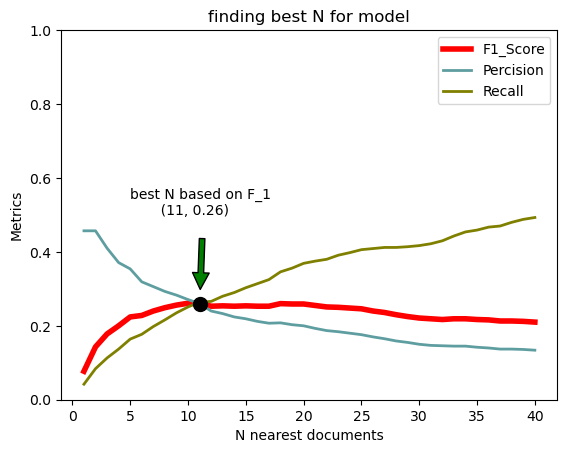

In [31]:
# Plotting Precision , Recall , and F1 Score Lines
plt.plot(ind ,
         f_measure ,
         linewidth = 4 ,
         label = 'F1_Score' ,
         color = 'red')

plt.plot(ind ,
         percision ,
         linewidth = 2 ,
         label = 'Percision' ,
         color = 'cadetblue')

plt.plot(ind ,
         recall ,
         linewidth = 2 ,
         label = 'Recall' ,
         color = 'olive')


#Limiting the Y-Axis Values
plt.ylim(0 , 1)


# Annotating the Best F1 Score
plt.plot(11 , 
         0.26 ,
         marker = 'o',
         ms = 10 , 
         mfc = 'k',
         mec = 'k')

plt.title('finding best N for model')
plt.annotate('best N based on F_1 \n       (11, 0.26)' ,
             xy = (11, 0.25) ,
             xytext = (5, 0.5) ,
             arrowprops = dict(facecolor = 'green' , shrink = 0.2))

# Adding Labels and Legend
plt.ylabel('Metrics')
plt.xlabel('N nearest documents')
plt.legend()


#Displaying the Chart
plt.show()

##  6.Implementing LSI and Dimension Reduction

In [32]:
svd_model = TruncatedSVD(2)

svd_transformer = Pipeline([('tfidf' , tfidf_vectorizer) ,
                            ('tfidf_t' , tfidf_transformer) ,
                            ('svd' , svd_model)])

svd_documents = pd.DataFrame(svd_transformer.fit_transform(pp_documents_txt['texts']) ,
                             columns = ["con1" , "con2"] ,
                             index = pp_documents_txt.index)

svd_query = pd.DataFrame(svd_transformer.transform(pp_queries_txt['texts']) ,
                         columns = ["con1" , "con2"],
                         index = range(1 , 36))

In [33]:
cosine_sim_svd = pd.DataFrame(np.argsort(- cosine_similarity(svd_query , svd_documents)) ,
                              columns = ["rank" + str(i) for i in range(1 , 6002)] ,
                              index = range(1 , 36) , 
                              dtype = 'int')

In [34]:
first_11th_svd = first_nth(11 , cosine_sim_svd)

In [35]:
metrics_svd11 = calculate_metrics(11 , first_11th_svd)

In [36]:
print('for lsa model with using 11 nearest documents f_1 is:' ,
      metrics_svd11[0] ,
      'percision is:' ,
      metrics_svd11[1] ,
      'and recall is:' ,
      metrics_svd11[2])

for lsa model with using 11 nearest documents f_1 is: 0.013 percision is: 0.013 and recall is: 0.013


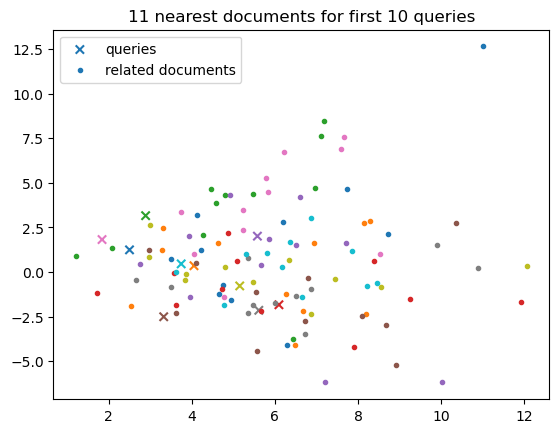

In [37]:
clr = ['#1f77b4' ,
       '#ff7f0e' ,
       '#2ca02c' ,
       '#d62728' ,
       '#9467bd' ,
       '#8c564b' ,
       '#e377c2' ,
       '#7f7f7f' ,
       '#bcbd22' ,
       '#17becf']

plt.scatter(svd_query.iloc[ : 10]['con1'] ,
            svd_query.iloc[ : 10]['con2'] ,
            marker = 'x',
            c = clr ,
            label = 'queries')

for i in range(10):
    if i == 0 :
        plt.scatter(svd_documents.iloc[first_11th_svd.iloc[i]]['con1'] ,
                    svd_documents.iloc[first_11th_svd.iloc[i]]['con2'] ,
                    marker = '.' ,
                    c = clr[i] ,
                    label = 'related documents')
    else :
        plt.scatter(svd_documents.iloc[first_11th_svd.iloc[i]]['con1'] ,
                    svd_documents.iloc[first_11th_svd.iloc[i]]['con2'] ,
                    marker = '.' ,
                    c = clr[i])

plt.title('11 nearest documents for first 10 queries')
plt.legend()
plt.show()